In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
!pip install lux

In [86]:
!pip install lux-api


In [3]:
# EDA Part 
import lux 
lux.config.display_mode = "default"
from sklearn.preprocessing import MinMaxScaler 

In [4]:
df = pd.read_csv('parkinsons.data')
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
df.info() 
# dataset is having no null value 

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
pd.pandas.set_option('display.max_columns',None)
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


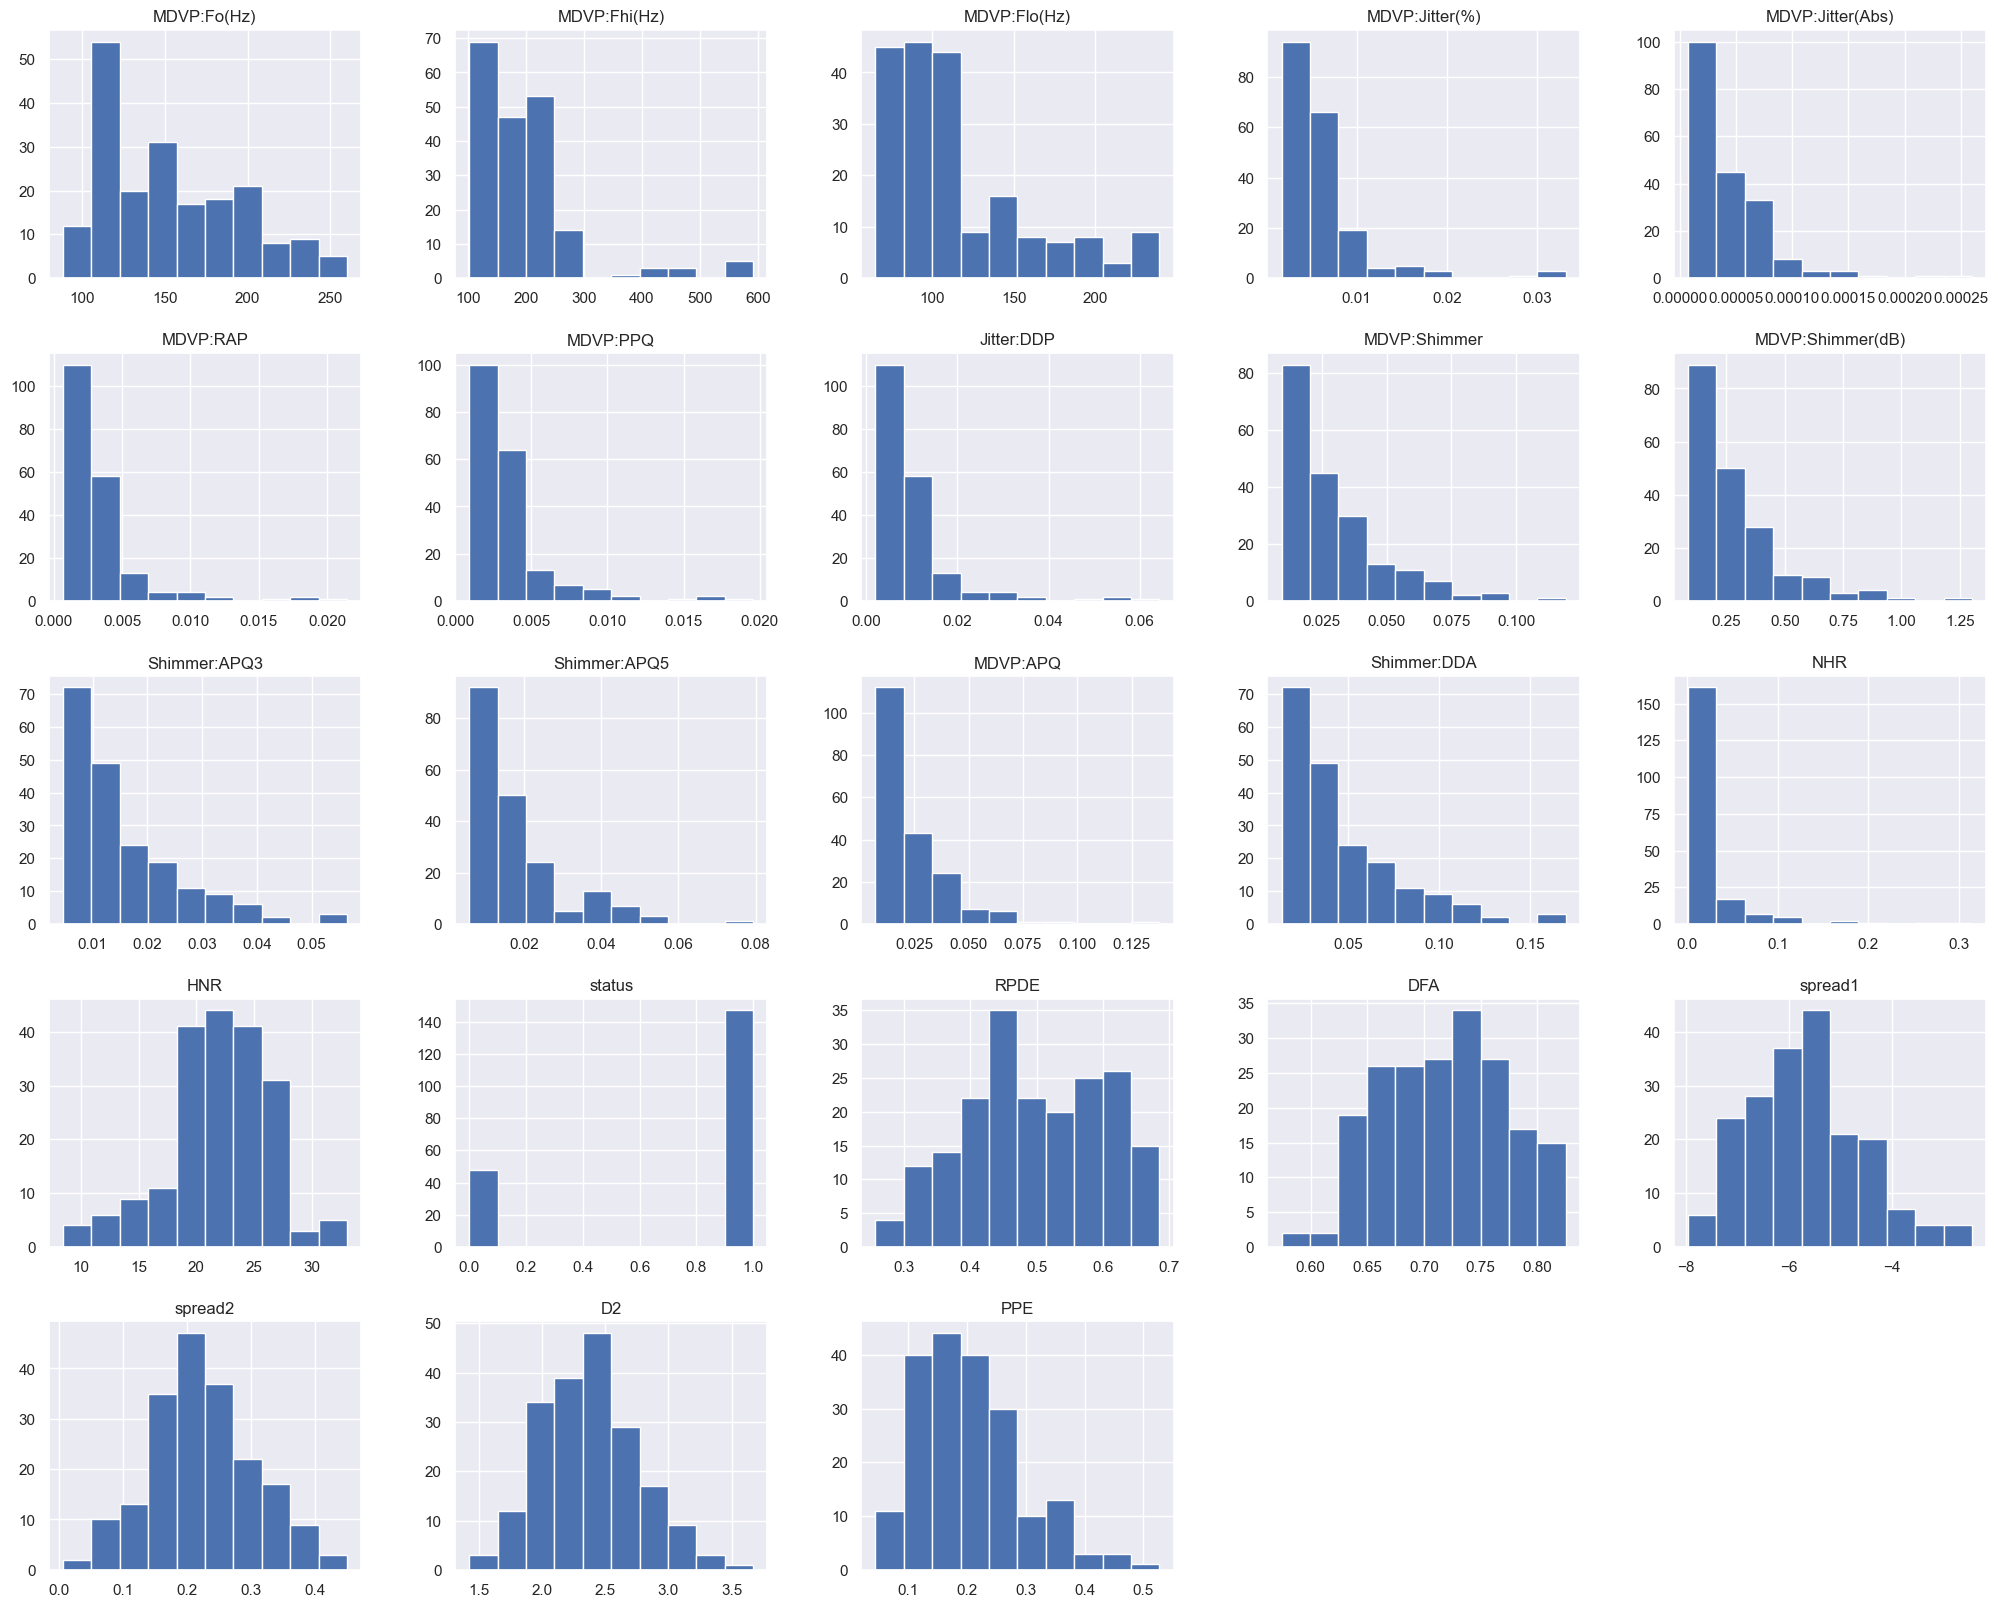

In [9]:
df.hist(figsize=(25,20))
plt.show()

In [8]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [10]:
#Status col is dependent variable it has value as 0 - i.e. no parkinson disease and 1 - means parkinson disease is there 
df['status'].value_counts()
# Result suggest it's an inbalance dataset 

status
1    147
0     48
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


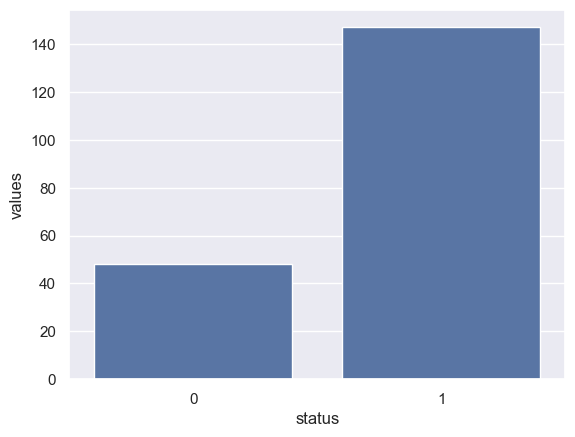

In [14]:
#Visual representation of imbalance data
temp = df['status'].value_counts()
temp_df = pd.DataFrame({'status':temp.index, 'values':temp.values})
print(sns.barplot(x='status',y='values',data=temp_df))

In [11]:
# Finding unique value from dataset
for i in df.columns:
    print("**********",i,"********")
    print()
    print(set(df[i].tolist()))
    print()
      


********** name ********

{'phon_R01_S06_6', 'phon_R01_S33_1', 'phon_R01_S24_4', 'phon_R01_S44_1', 'phon_R01_S16_5', 'phon_R01_S06_2', 'phon_R01_S31_6', 'phon_R01_S10_6', 'phon_R01_S26_1', 'phon_R01_S43_5', 'phon_R01_S04_4', 'phon_R01_S22_6', 'phon_R01_S04_5', 'phon_R01_S50_5', 'phon_R01_S42_4', 'phon_R01_S20_4', 'phon_R01_S13_6', 'phon_R01_S37_6', 'phon_R01_S07_1', 'phon_R01_S07_2', 'phon_R01_S27_7', 'phon_R01_S08_3', 'phon_R01_S21_5', 'phon_R01_S04_6', 'phon_R01_S13_5', 'phon_R01_S16_6', 'phon_R01_S25_2', 'phon_R01_S01_5', 'phon_R01_S44_3', 'phon_R01_S21_1', 'phon_R01_S39_4', 'phon_R01_S06_5', 'phon_R01_S31_2', 'phon_R01_S37_1', 'phon_R01_S25_3', 'phon_R01_S19_1', 'phon_R01_S42_5', 'phon_R01_S43_3', 'phon_R01_S20_2', 'phon_R01_S25_4', 'phon_R01_S21_4', 'phon_R01_S35_7', 'phon_R01_S02_3', 'phon_R01_S27_1', 'phon_R01_S07_3', 'phon_R01_S07_4', 'phon_R01_S10_4', 'phon_R01_S21_6', 'phon_R01_S05_6', 'phon_R01_S37_3', 'phon_R01_S18_6', 'phon_R01_S24_2', 'phon_R01_S18_4', 'phon_R01_S22_4', '

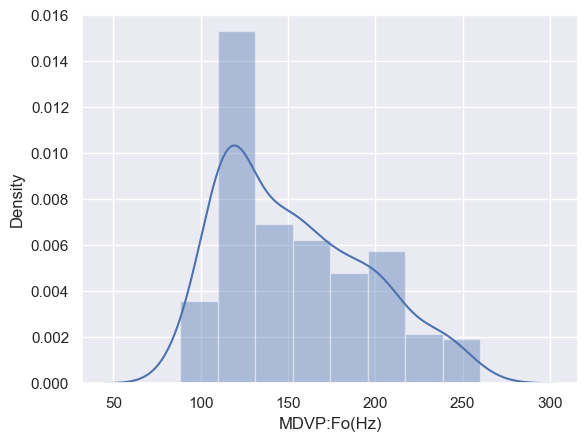

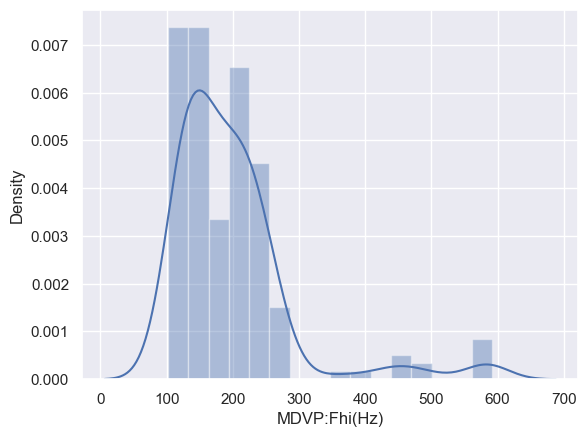

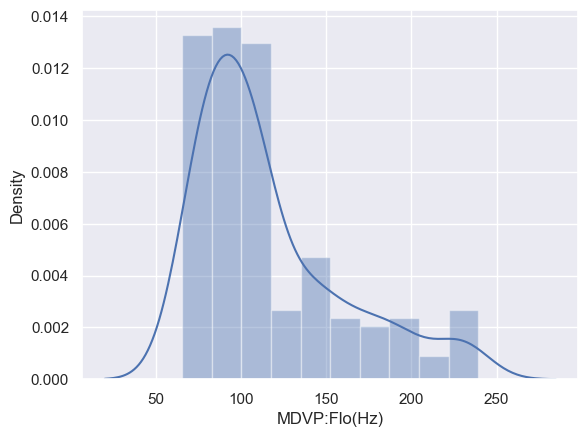

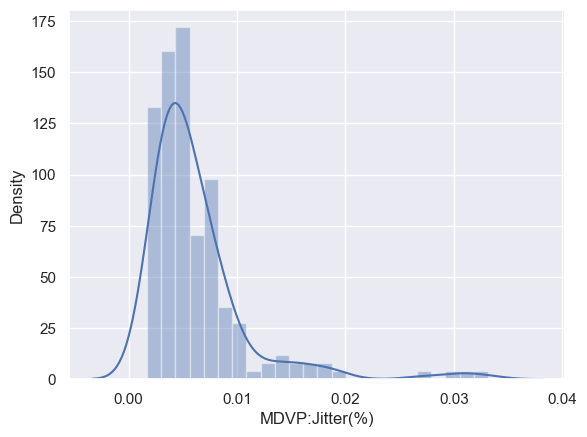

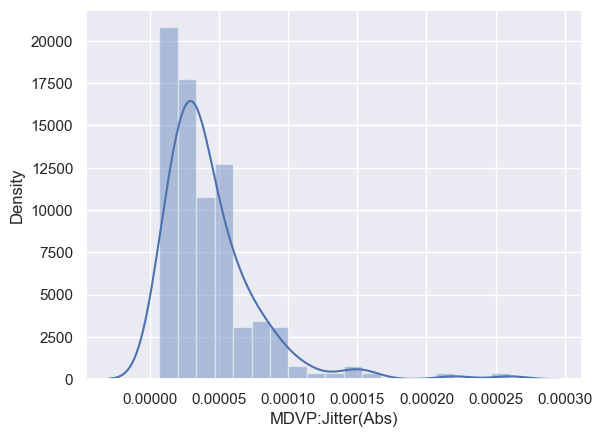

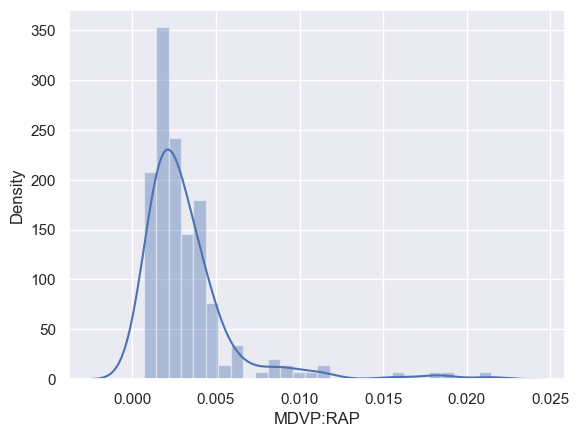

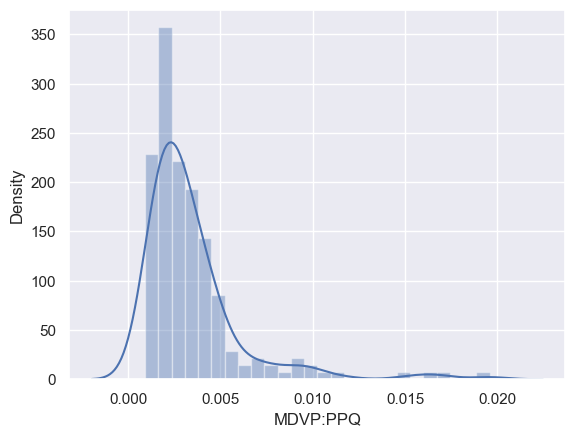

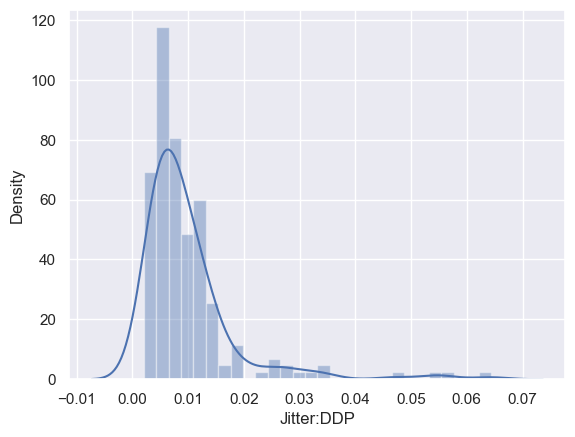

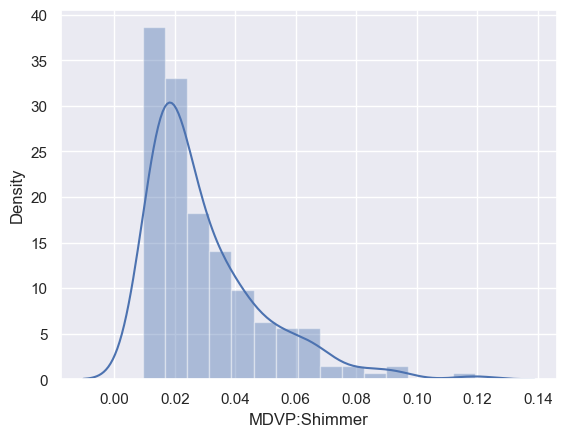

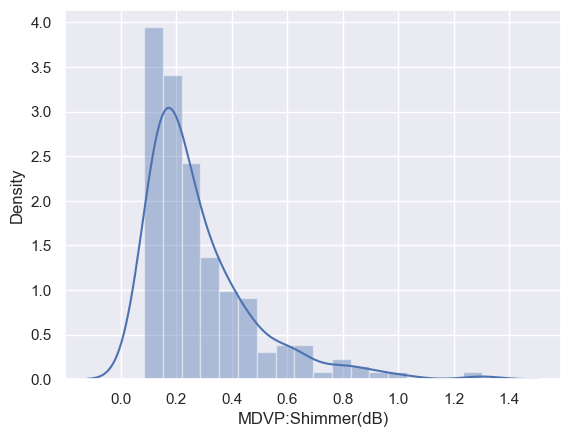

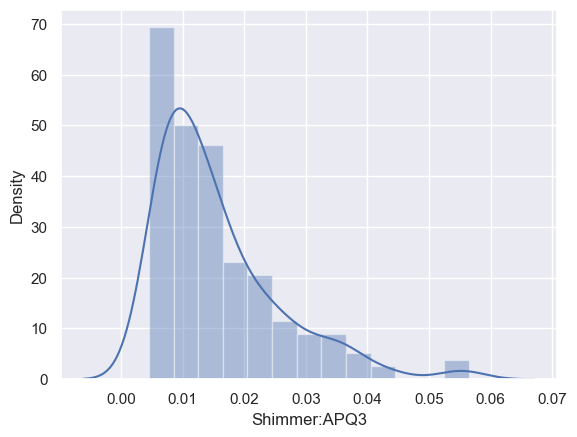

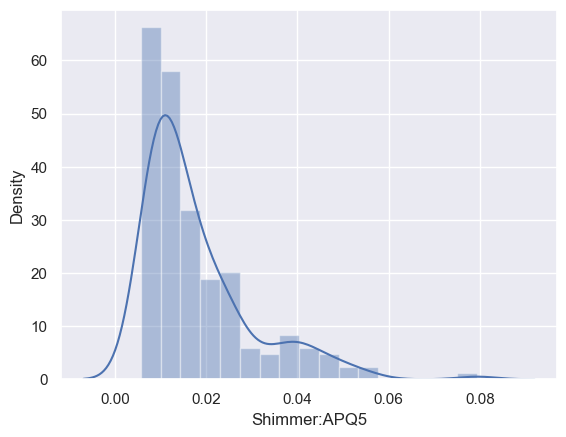

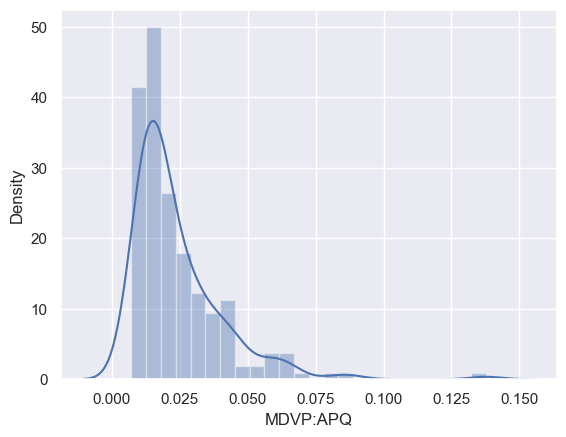

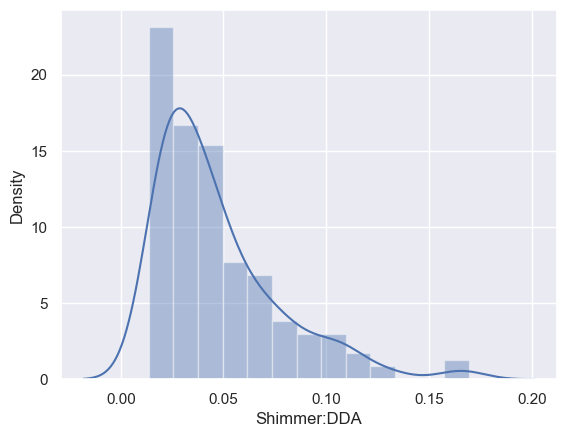

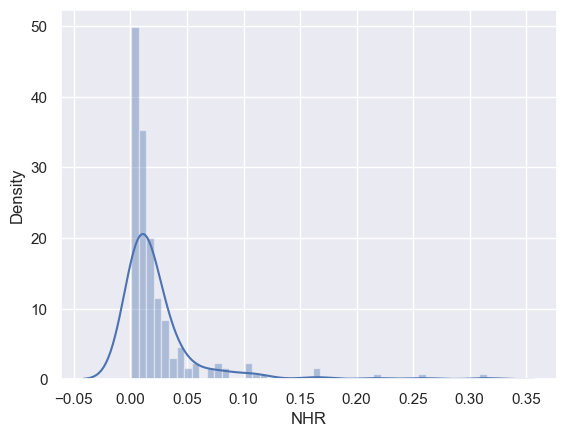

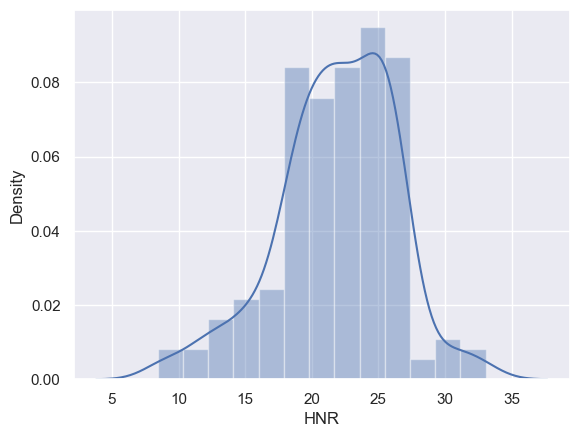

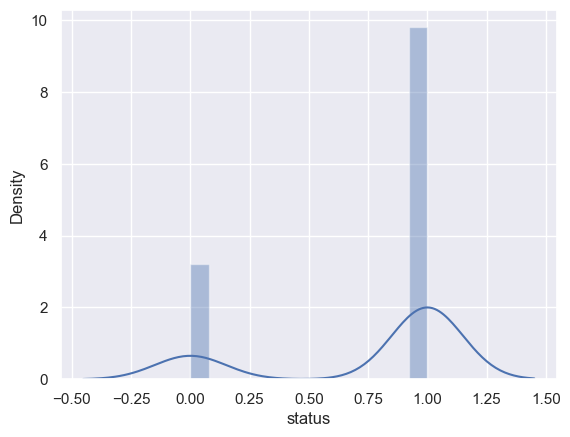

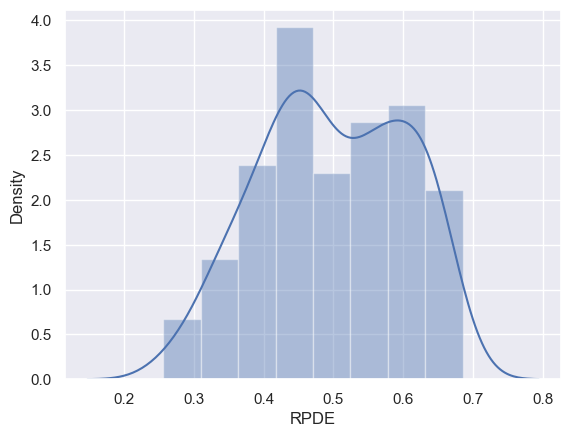

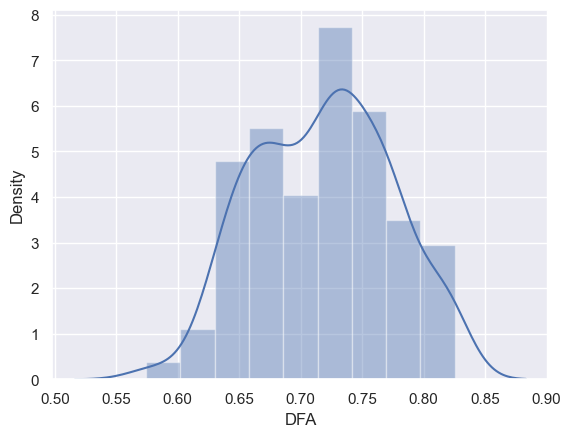

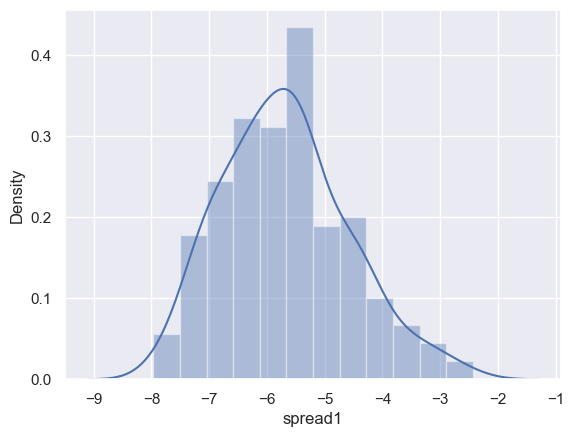

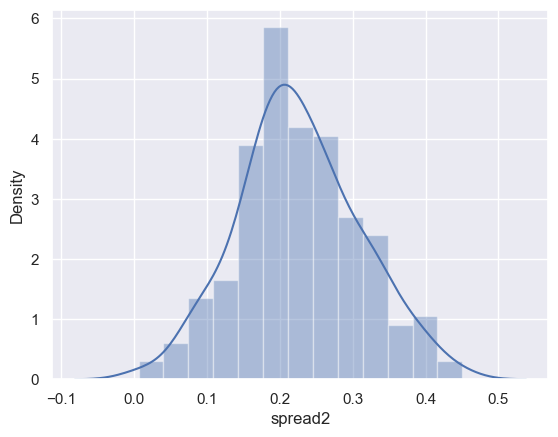

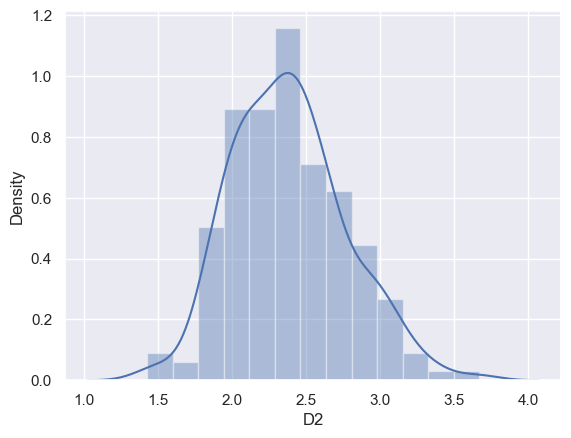

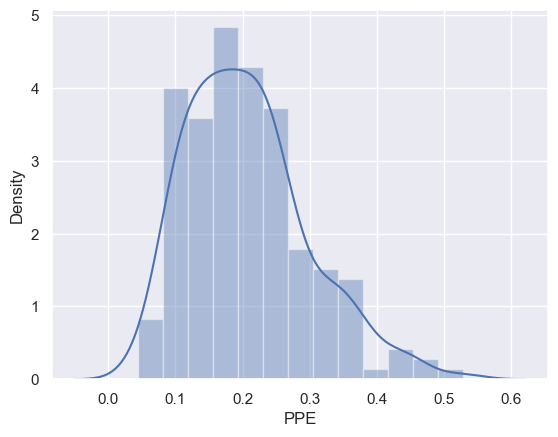

In [15]:
#Checking distribution of data 
def distplots(col):
    sns.distplot(df[col])
    plt.show()
#starting from 1st col as 0th col ie name is of object type
for i in list(df.columns)[1:]:
    distplots(i)



In [ ]:

# In clinical sector we don't handle outlier as if value is above normal then machine can find out that it's having disease 


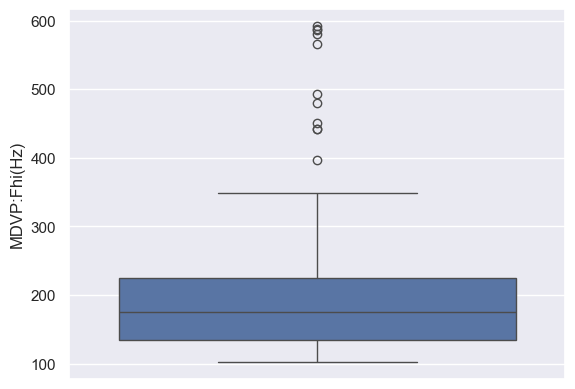

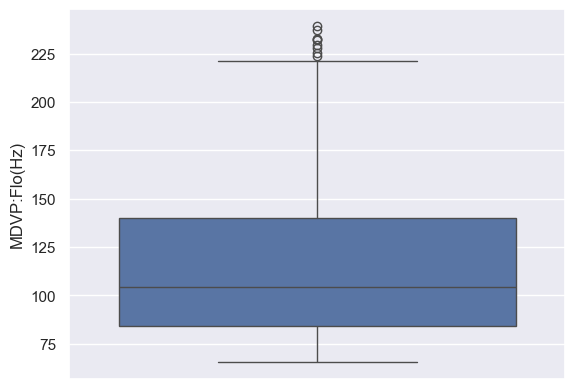

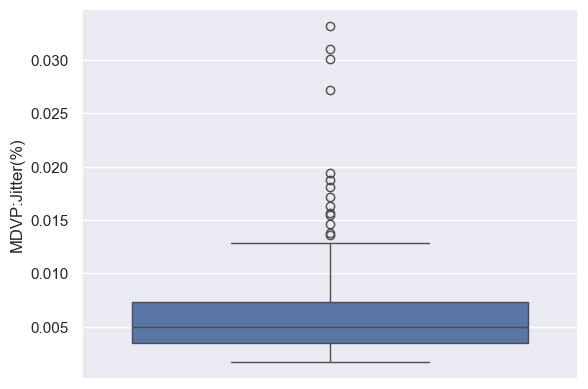

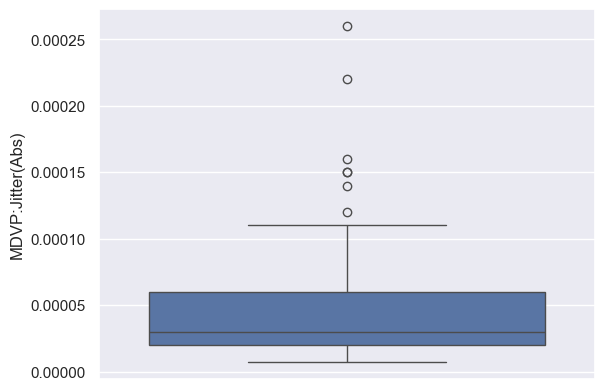

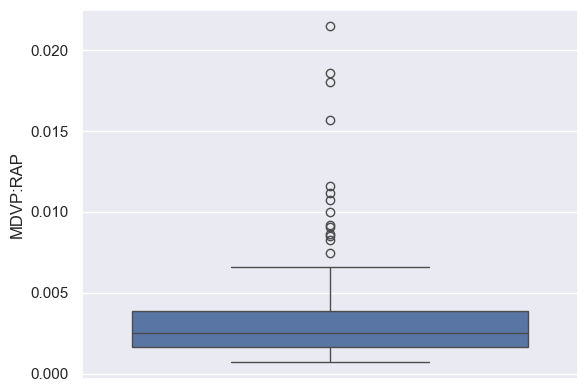

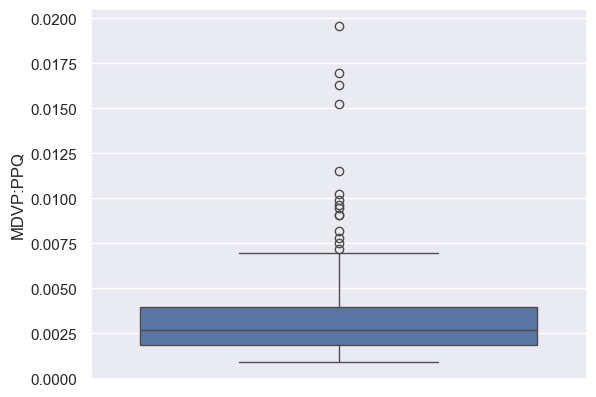

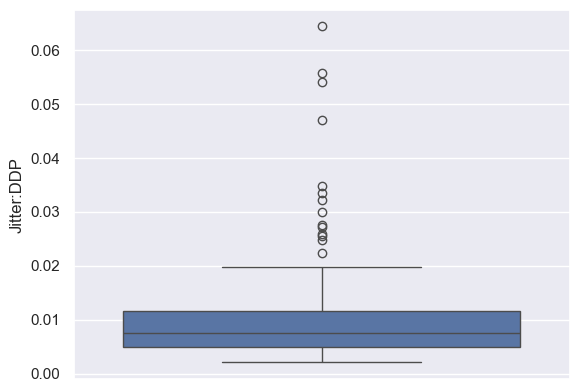

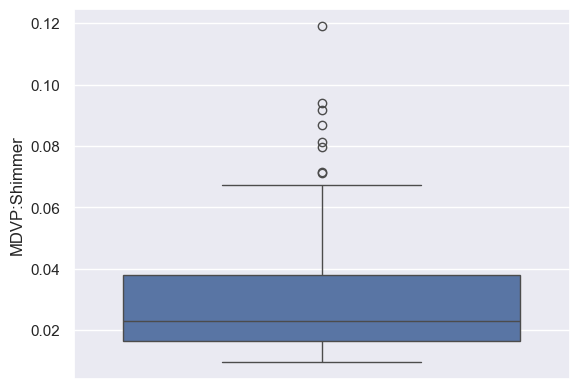

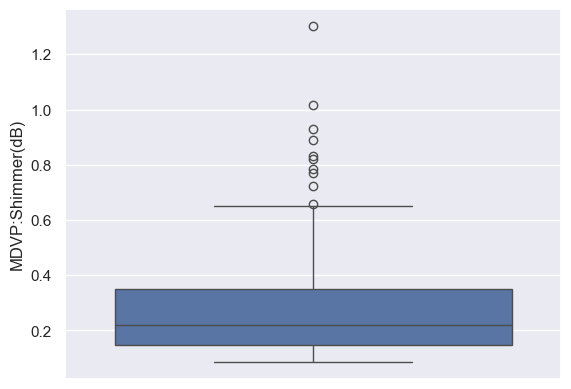

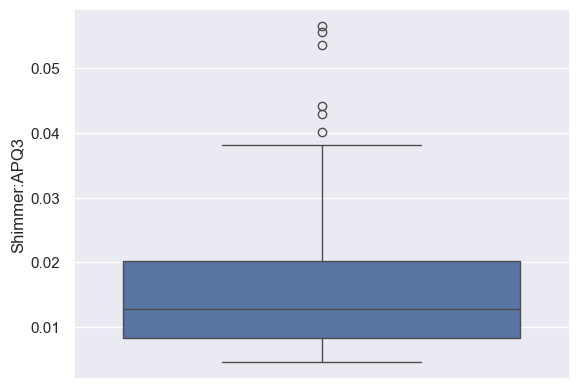

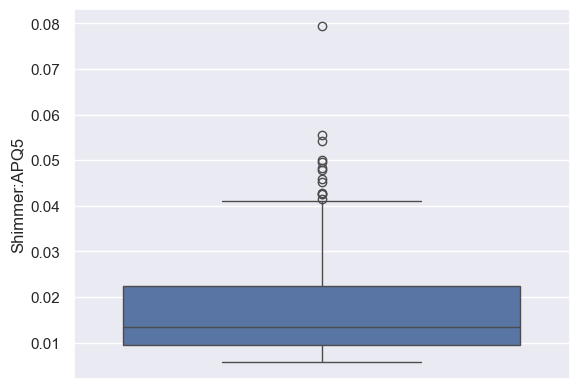

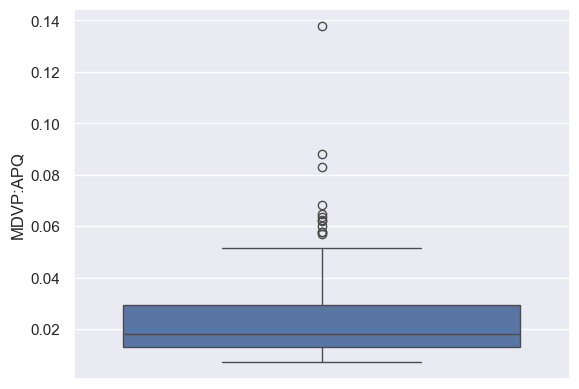

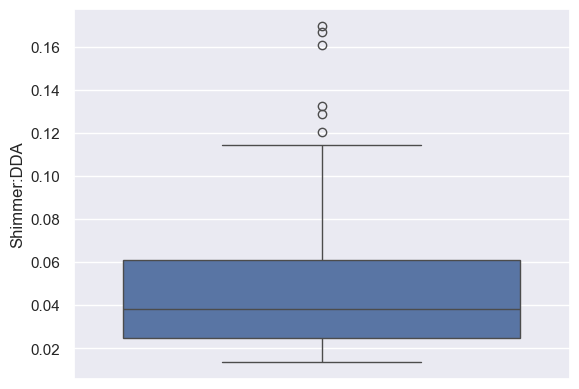

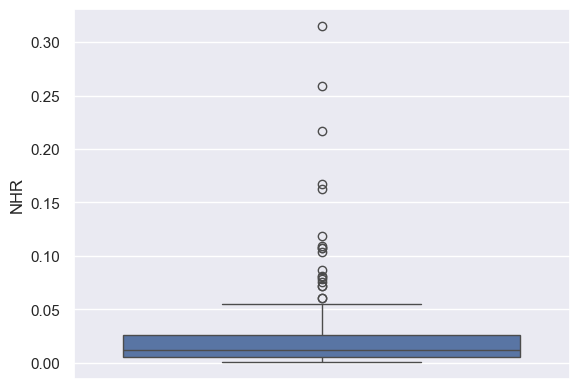

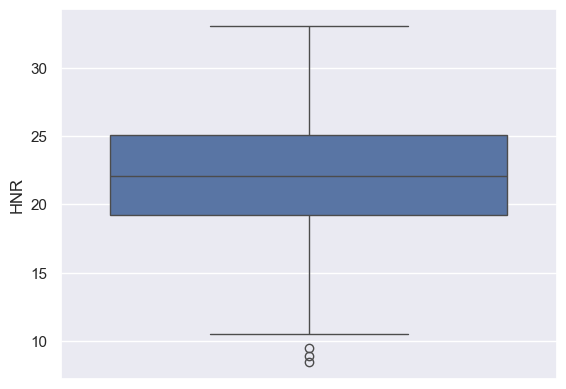

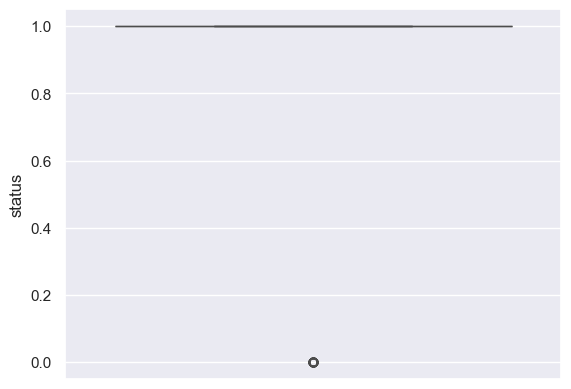

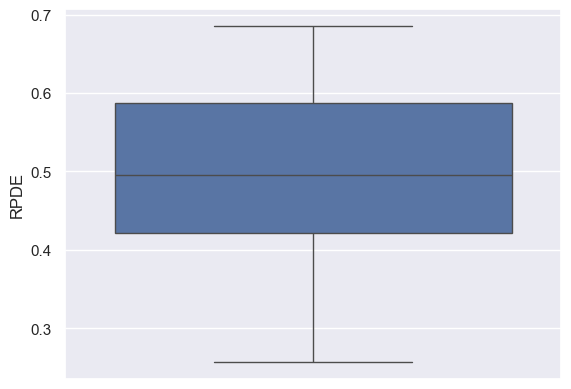

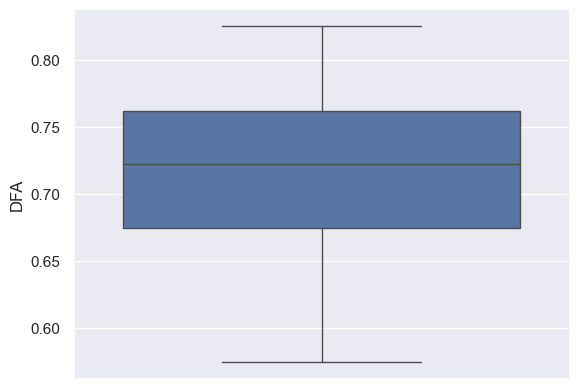

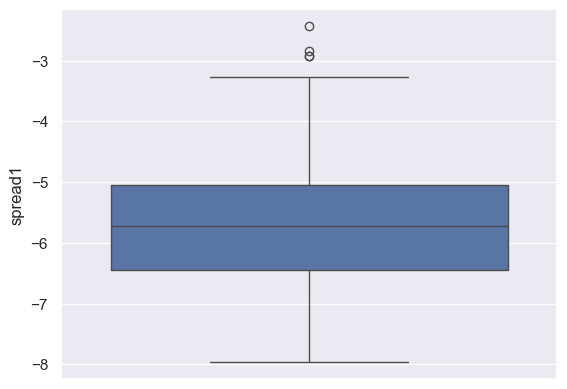

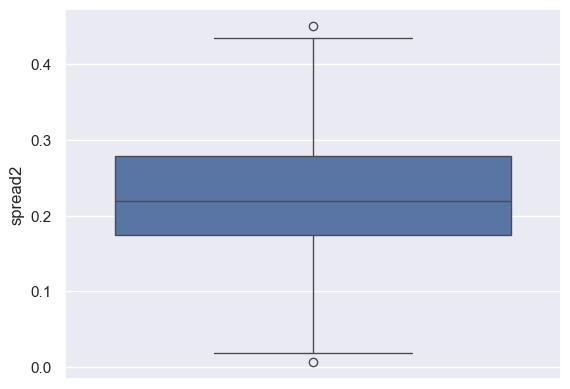

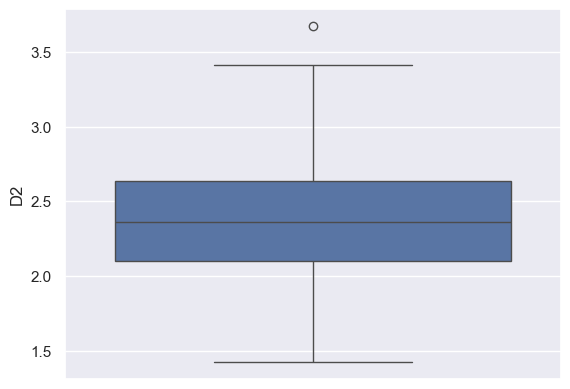

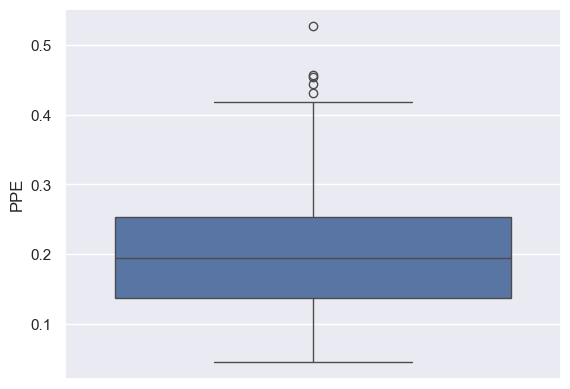

In [18]:
#Box plot also showing outlier presence
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
#starting from 1st col as 0th col ie name is of object type
for i in list(df.select_dtypes(exclude=['object']))[1:]:
    boxplots(i)


In [19]:
#Advance EDA - dtale
!pip install dtale

     ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
     ---------------------------------------  61.4/62.3 kB 1.1 MB/s eta 0:00:01
     ---------------------------------------- 62.3/62.3 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/642.7 kB ? eta -:--:--
     ---- ---------------------------------- 71.7/642.7 kB 3.8 MB/s eta 0:00:01
     --------- ---------------------------- 163.8/642.7 kB 1.6 MB/s eta 0:00:01
     ------------ ------------------------- 204.8/642.7 kB 1.8 MB/s eta 0:00:01
     --------------

In [20]:
import dtale
import dtale.app as dtale_app

In [21]:
dtale.show(df)

In [35]:
# Checking duplicate data 
df.duplicated().sum()

0

In [43]:
# Name column is non significant variable so drop it 
df.drop(columns='name', inplace = True)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [44]:
# Splitting data into train test split 
X= df.drop(['status'],axis = 1)
Y = df['status']

In [45]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [47]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64


In [48]:
Y.value_counts()

status
1    147
0     48
Name: count, dtype: int64


In [50]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 660.6 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.0 kB 919.0 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 901.1 kB/s eta 0:00:01
   -------------------------- ------------- 174.1/258.0 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 235.5/258.0 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.1 MB/s eta 0:00:00


In [53]:
#Handling imbalance dataset - using Oversampling/SMOTE
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_resample(X,Y) #resampling bcz 0 is 48 times we want it to be = to 147 times


In [55]:
pd.DataFrame(y_ros).value_counts() #Now both values r 147 

0    147
1    147
Name: count, dtype: int64


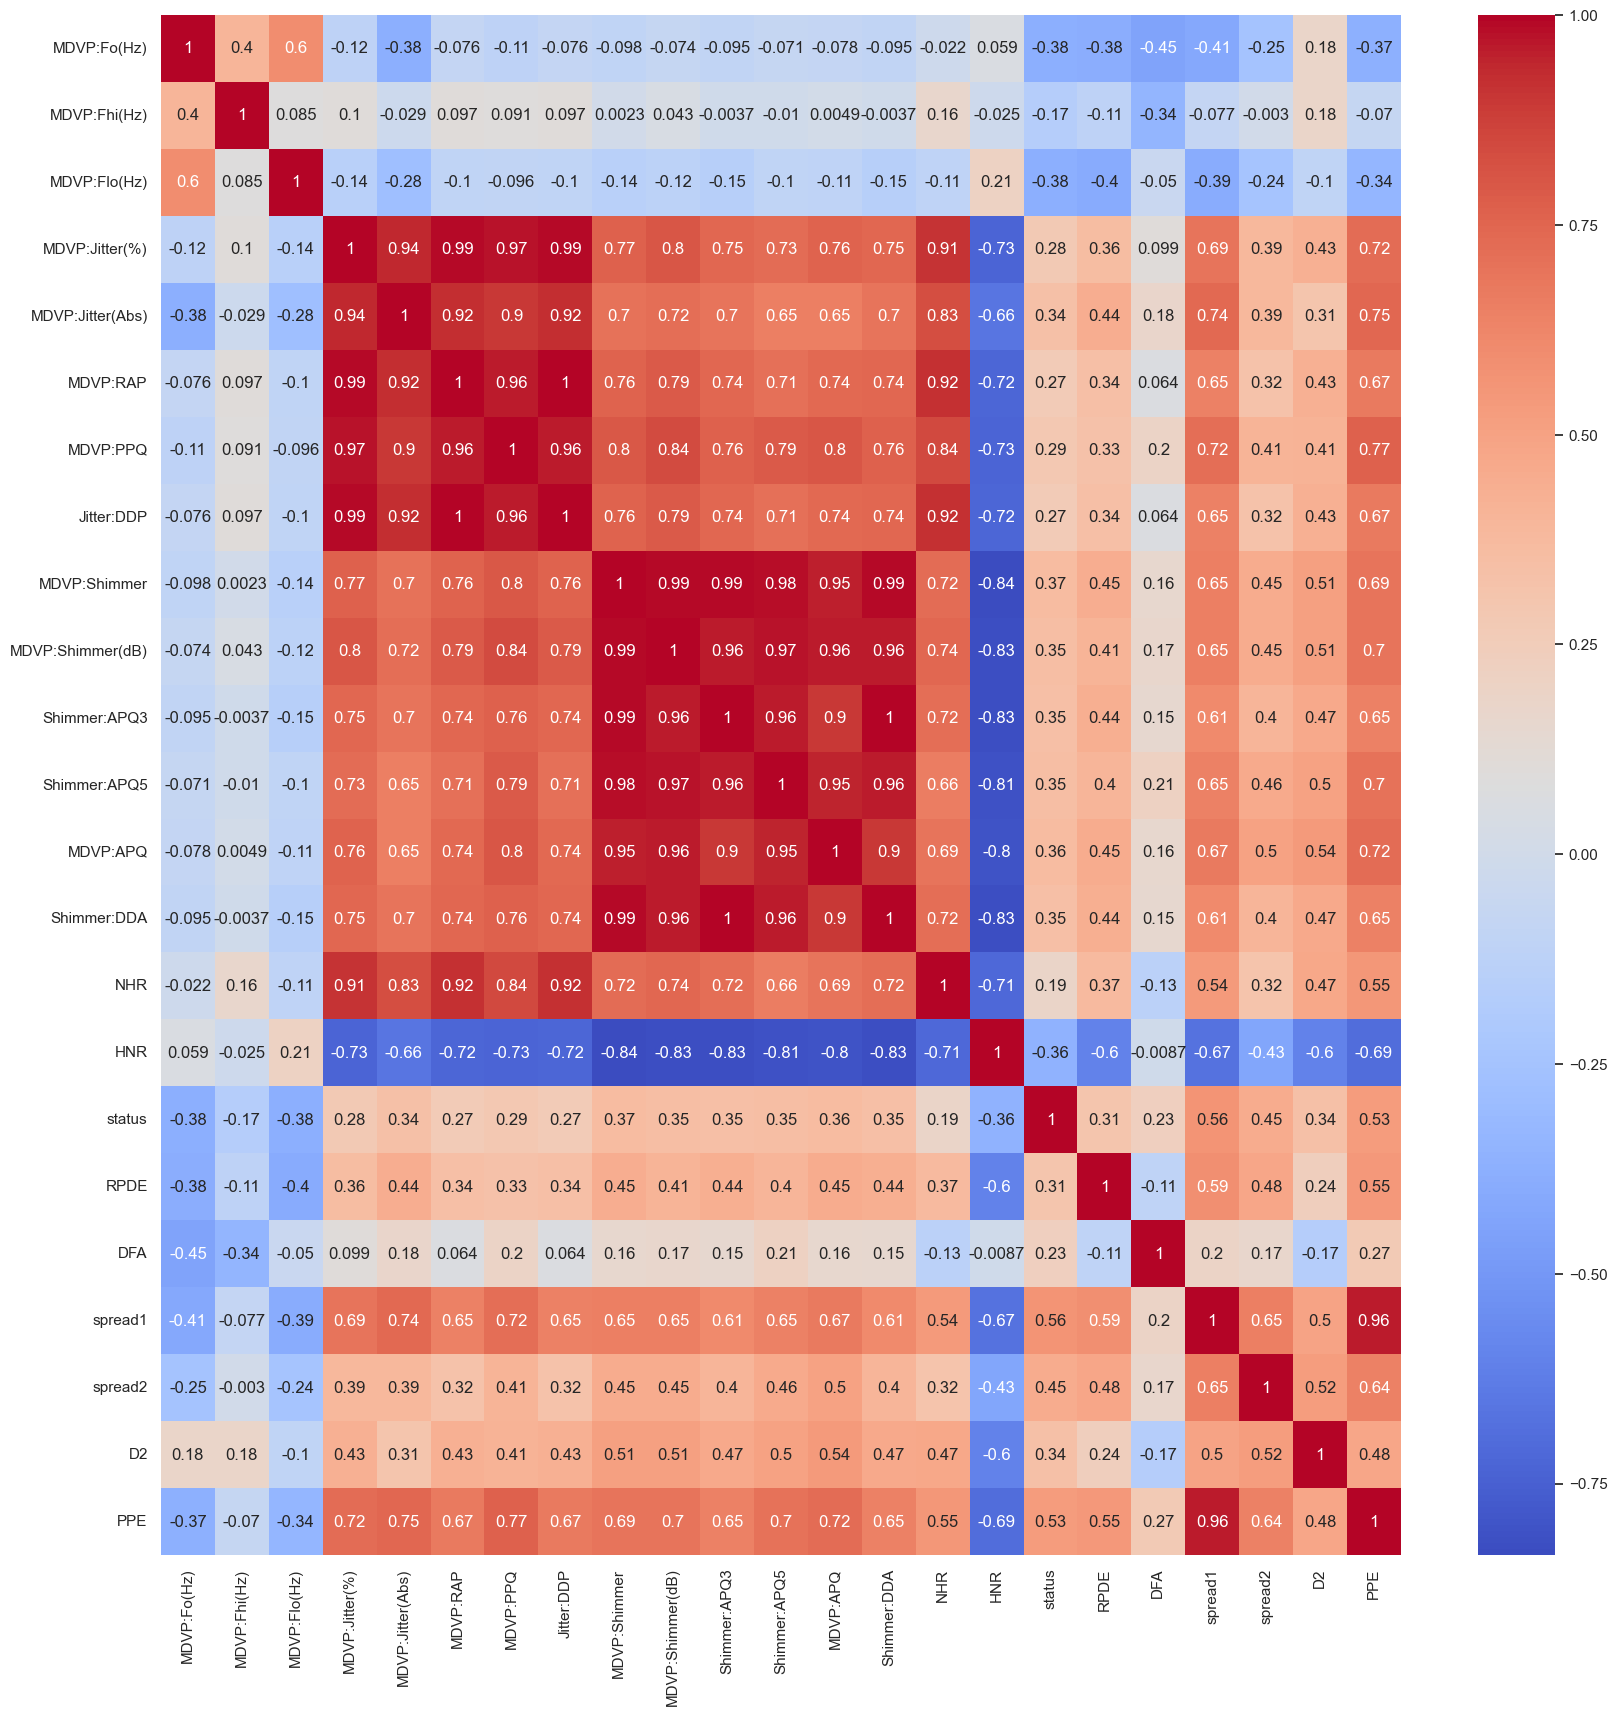

In [59]:
#Checking correlation 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')
plt.show()

In [60]:
#Feature Scaling 

s = MinMaxScaler((-1,1)) 
X = s.fit_transform(x_ros)
Y = y_ros 

In [62]:
pd.DataFrame(X).shape

(294, 22)

In [63]:
#Principal Component Analysis - Dimension Reduction 


from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(X)
print(pd.DataFrame(X).shape)
print(x_pca.shape)
#Earlier 22 variable were impacting now it's reduced to 8, it's unsupervised method as we can't see what variables r reduced

(294, 22)
(294, 8)


In [66]:
#Split data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,Y, test_size =0.2,random_state=101)

In [69]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion ='gini',random_state=1)
rf.fit(x_train,y_train)




RandomForestClassifier(random_state=1)

In [71]:
y_pred_train = rf.predict(x_train)
y_pred_test= rf.predict(x_test)

In [74]:
#Evaluate 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [75]:
print(confusion_matrix(y_train,y_pred_train))
print()
print(confusion_matrix(y_test,y_pred_test))

[[114   0]
 [  0 121]]

[[33  0]
 [ 2 24]]


In [76]:
print(classification_report(y_train,y_pred_train))
print()
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



In [77]:
print(accuracy_score(y_train,y_pred_train))
print()
print(accuracy_score(y_test,y_pred_test))

1.0

0.9661016949152542


In [80]:
#Cross Validation Method 
from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(rf,x_train,y_train,cv=10)
test_acc = cross_val_score(rf,x_test,y_test,cv=10)

print("Train Mean Accuracy",train_acc.mean())

print("***********************************")
print("Test Mean Accuracy",test_acc.mean())


Train Mean Accuracy 0.9702898550724639
***********************************
Test Mean Accuracy 0.9


In [81]:
#XG Boost
from xgboost import XGBClassifier
xgb= XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [82]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [83]:
print(classification_report(y_train,y_pred_train_xgb))
print()
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.96      0.98        26

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [84]:
print(accuracy_score(y_train,y_pred_train_xgb))
print()
print(accuracy_score(y_test,y_pred_test_xgb))

1.0

0.9830508474576272


In [85]:
#Cross Validation Method 
from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(xgb,x_train,y_train,cv=10)
test_acc = cross_val_score(xgb,x_test,y_test,cv=10)

print("Train Mean Accuracy",train_acc.mean())

print("***********************************")
print("Test Mean Accuracy",test_acc.mean())

Train Mean Accuracy 0.966123188405797
***********************************
Test Mean Accuracy 0.8466666666666667


In [ ]:
#We will go with RF and not XGBoost as it's overfitting 